<a href="https://colab.research.google.com/github/anandmpandit/LSTM_Example/blob/main/LSTM_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#Description : This program uses Artificial neural network called LSTM (Long Short Term Memory) to predict closing stock price of a company
#              AAPL using last 60 days stock price

In [84]:
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
plt.style.use('fivethirtyeight')
plt.show()


In [85]:
#Get the yahoo finance libraries
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import yfinance as yf

In [87]:
df = yf.download('AAPL',start='2007-01-01', end='2023-03-15')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,3.081786,3.092143,2.925000,2.992857,2.547275,1238319600
2007-01-04,3.001786,3.069643,2.993571,3.059286,2.603815,847260400
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.585273,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.598038,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.813857,3349298400
...,...,...,...,...,...,...
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800
2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400


In [88]:
df.shape


(4077, 6)

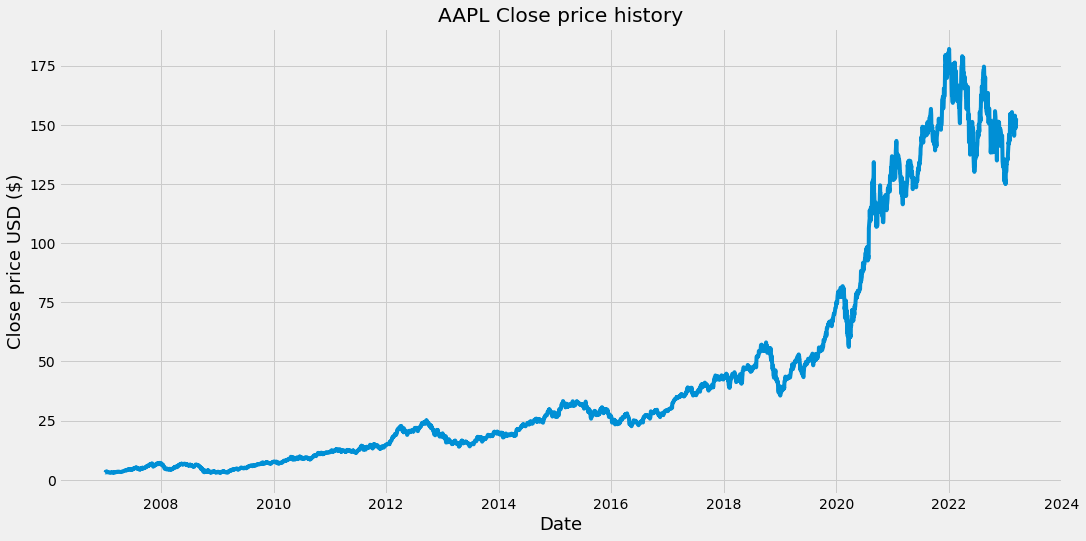

In [89]:
#Visualize closing price history

plt.figure(figsize=(16,8))
plt.title('AAPL Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [90]:
#Create new data frame with only the close price column
data = df.filter(['Close'])
print(data)

#Convert the dataframe to a numpy array
dataset = data.values

print(dataset)

#Get no of rows to train the model 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

                 Close
Date                  
2007-01-03    2.992857
2007-01-04    3.059286
2007-01-05    3.037500
2007-01-08    3.052500
2007-01-09    3.306071
...                ...
2023-03-08  152.869995
2023-03-09  150.589996
2023-03-10  148.500000
2023-03-13  150.470001
2023-03-14  152.589996

[4077 rows x 1 columns]
[[  2.99285698]
 [  3.05928612]
 [  3.0374999 ]
 ...
 [148.5       ]
 [150.47000122]
 [152.58999634]]


3262

In [91]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data 


array([[0.00111596],
       [0.00148663],
       [0.00136506],
       ...,
       [0.81302014],
       [0.8240124 ],
       [0.8358416 ]])

In [92]:
#Create training dataset
#Create scaled training dataset
train_data = scaled_data[0:training_data_len,:]

print(train_data)
#Split the dataset x_train and y_train datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[[0.00111596]
 [0.00148663]
 [0.00136506]
 ...
 [0.36309106]
 [0.36823845]
 [0.37480868]]
[array([0.00111596, 0.00148663, 0.00136506, 0.00144876, 0.00286364,
       0.00374646, 0.00350732, 0.00327217, 0.00376638, 0.00333793,
       0.00216617, 0.00205258, 0.00171181, 0.0014946 , 0.00169388,
       0.0016042 , 0.00143083, 0.00154243, 0.0014647 , 0.00150058,
       0.00130329, 0.00130528, 0.00114386, 0.00118571, 0.00158427,
       0.00159025, 0.00101035, 0.00133119, 0.00129532, 0.00141489,
       0.00139695, 0.00132122, 0.00153445, 0.00219207, 0.00225385,
       0.00216617, 0.00205457, 0.00114187, 0.00127738, 0.00176562,
       0.00143681, 0.00161815, 0.0019908 , 0.00189714, 0.00195294,
       0.00194696, 0.00232559, 0.00203265, 0.0023515 , 0.00226581,
       0.00226979, 0.00257668, 0.00264643, 0.00312271, 0.00314064,
       0.00305296, 0.00351728, 0.00343957, 0.00299716, 0.00309879])]
[0.002931399391199704]

[array([0.00111596, 0.00148663, 0.00136506, 0.00144876, 0.00286364,
       0.00

In [93]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

print (x_train)
print (y_train)

x_train.shape

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



[[0.00111596 0.00148663 0.00136506 ... 0.00343957 0.00299716 0.00309879]
 [0.00148663 0.00136506 0.00144876 ... 0.00299716 0.00309879 0.0029314 ]
 [0.00136506 0.00144876 0.00286364 ... 0.00309879 0.0029314  0.00307887]
 ...
 [0.29517068 0.29264581 0.28814009 ... 0.35675799 0.35893412 0.36212854]
 [0.29264581 0.28814009 0.2895211  ... 0.35893412 0.36212854 0.36309106]
 [0.28814009 0.2895211  0.28807034 ... 0.36212854 0.36309106 0.36823845]]
[0.0029314  0.00307887 0.00324826 ... 0.36309106 0.36823845 0.37480868]


(3202, 60, 1)

In [94]:
#Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [95]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [96]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1,verbose="auto")

3202/3202 [==============================] - 112s 33ms/step - loss: 1.3096e-04


In [97]:
#Create a test data set
#Create a new array containing scaled values from index 3262 to 4077
print(training_data_len)
test_data = scaled_data[training_data_len - 60:,:]

print(test_data)

#Create data sets x_test and y_test
x_test =[]
y_test =dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



#Convert data to a numpy array
x_test = np.array(x_test)

print(x_test)

#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))






3262
[[0.2895211 ]
 [0.28807034]
 [0.29274345]
 [0.2911532 ]
 [0.28966061]
 [0.29684462]
 [0.29770949]
 [0.2898559 ]
 [0.29245052]
 [0.30108528]
 [0.30115503]
 [0.29744444]
 [0.30111318]
 [0.30538174]
 [0.31391889]
 [0.31344459]
 [0.31267738]
 [0.31135215]
 [0.31262157]
 [0.31419788]
 [0.31991718]
 [0.31914997]
 [0.32364171]
 [0.32419971]
 [0.32838457]
 [0.33183012]
 [0.32379516]
 [0.32375331]
 [0.33142557]
 [0.34127397]
 [0.34361749]
 [0.34310136]
 [0.34325479]
 [0.34630975]
 [0.34730019]
 [0.3501738 ]
 [0.34983898]
 [0.35334033]
 [0.35078758]
 [0.35513984]
 [0.35700908]
 [0.35587916]
 [0.35155479]
 [0.34990876]
 [0.3495879 ]
 [0.35599074]
 [0.35308925]
 [0.35804133]
 [0.35721831]
 [0.3529079 ]
 [0.34633767]
 [0.34953209]
 [0.35488872]
 [0.36204485]
 [0.35675799]
 [0.35893412]
 [0.36212854]
 [0.36309106]
 [0.36823845]
 [0.37480868]
 [0.37557593]
 [0.3746413 ]
 [0.37503188]
 [0.37422283]
 [0.38058382]
 [0.38096044]
 [0.38882802]
 [0.38867455]
 [0.39107387]
 [0.39404514]
 [0.40339136]
 

In [98]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


26/26 [==============================] - 1s 21ms/step


In [99]:
#Get the root mean sqaured error (RMSE) for the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.835769233603655

                 Close
Date                  
2019-12-17   70.102501
2019-12-18   69.934998
2019-12-19   70.004997
2019-12-20   69.860001
2019-12-23   71.000000
...                ...
2023-03-08  152.869995
2023-03-09  150.589996
2023-03-10  148.500000
2023-03-13  150.470001
2023-03-14  152.589996

[815 rows x 1 columns]
                 Close  predictions
Date                               
2019-12-17   70.102501    66.964729
2019-12-18   69.934998    67.466469
2019-12-19   70.004997    67.891022
2019-12-20   69.860001    68.236366
2019-12-23   71.000000    68.483002
...                ...          ...
2023-03-08  152.869995   145.105927
2023-03-09  150.589996   145.858200
2023-03-10  148.500000   146.210922
2023-03-13  150.470001   146.088516
2023-03-14  152.589996   146.050049

[815 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

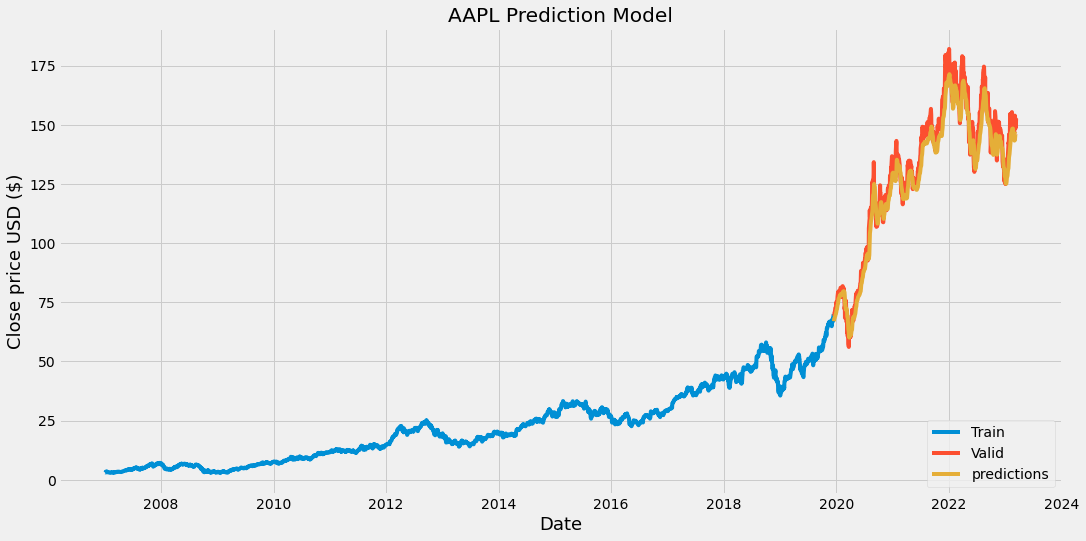

In [100]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

print(valid)
#valid['predictions'] = predictions
valid.loc[:,('predictions')] = predictions
print(valid)


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('AAPL Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Valid','predictions'], loc='lower right')
plt.show


In [101]:
#Show valid(Actual) and predicted stock prices 
valid


,Close,predictions
Date,,
2019-12-17,70.102501,66.964729
2019-12-18,69.934998,67.466469
2019-12-19,70.004997,67.891022
2019-12-20,69.860001,68.236366
2019-12-23,71.000000,68.483002
...,...,...
2023-03-08,152.869995,145.105927
2023-03-09,150.589996,145.858200
2023-03-10,148.500000,146.210922


In [102]:
#Get the quote
apple_quote = yf.download('AAPL',start='2007-01-01', end='2023-03-15')
#Create new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert them into array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)


[*********************100%***********************]  1 of 1 completed


In [103]:
#Create an empty list
X_test = []
#Append past 60 days data
X_test.append(last_60_days_scaled)


In [104]:
#Convert the X_Test dataset to numpy array 
X_test=np.array(X_test)

In [105]:
#Reshape the 2D data into 3D array
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [106]:
#Get the predicted scaled price
pred_price = model.predict(X_test,verbose='auto')


1/1 [==============================] - 0s 31ms/step


In [107]:
#Undo Scaling
pred_price = scaler.inverse_transform(pred_price)

In [108]:
print(pred_price)

[[146.30923]]


In [109]:
#Get the quote
apple_quote2 = yf.download('AAPL',start='2023-03-16', end='2023-03-17')
print(apple_quote2)
#Create new data frame

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-16  152.160004  156.460007  151.639999  155.850006  155.850006   

              Volume  
Date                  
2023-03-16  76161100  
